In [1]:
from PIL import Image
import glob
import numpy as np
import os
from os.path import basename

image_label_list = []
for filename in glob.glob('Dataset/*.png'): #assuming png
    im = Image.open(filename)
    label = (filename.split("_")[1])
    #print(label)
    image_label_list.append(label)
    im.close()

#print(image_label_list)

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

flat_Image_List = [] # new list containing flatten image arrays
for filename in glob.glob('Dataset/*.png'):# iterate over the images contained in the directory
    im = Image.open(filename)
    img = np.reshape(im, (12288))
    flat_Image_List.append(img) # Append to the list 
    #plt.imshow(img)
    im.close()
    #print(flat_Image_List)
#print(flat_Image_List)

In [3]:
imageSize = 12288

In [4]:
from numpy import array

image_array = array(flat_Image_List)

#print(flat_Image_List)
#print(image_array)

In [5]:
len(image_array)

73055

In [6]:
image_array[0].shape

(12288,)

In [7]:
image_array = np.reshape(image_array,(len(image_array), 64, 64, 3))

In [8]:
image_array = image_array.astype('float32')

In [9]:
# Converts RGB to a range between 0-1
image_array = image_array/255

In [10]:
noLabels = len(np.unique(image_label_list))
print(noLabels)
label_array = np.array(image_label_list)
print(label_array.shape)

15
(73055,)


In [11]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

data = ['0', '1', '2','3', '4','5', '6','7', '8', '9', 'A', 'B', 'C', 'D', 'E']

values = array(data)
print(values)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E']


In [12]:
# integer encode
label_encoder = LabelEncoder()
labelData = label_encoder.fit_transform(label_array)
print(labelData)

[ 0  0  0 ... 14 14 14]


In [13]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
labelData = labelData.reshape(len(labelData), 1)
labelData = onehot_encoder.fit_transform(labelData)
print(labelData)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [47]:
print(labelData[68000])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [41]:
# invert example
inverted = label_encoder.inverse_transform([argmax(labelData[68000, :])])
print(inverted)

['B']


C:\Users\niall\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
label_array.shape
print(label_array)

['0' '0' '0' ... 'E' 'E' 'E']


In [16]:
input_shape = (64, 64, 3)

In [17]:
import random
random.Random(4).shuffle(image_array)
random.Random(4).shuffle(labelData)
#print(image_array)
#print(labelData)

In [18]:
from sklearn.model_selection import train_test_split
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(image_array, labelData, test_size=0.15)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(62096, 64, 64, 3) (62096, 15)
(10959, 64, 64, 3) (10959, 15)


In [19]:
# ------- MODEL -------
# Import keras.
import keras as kr
import tensorflow as tf

# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Adapted from: https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d?fbclid=IwAR01njT_lhc2ZZOySJnWhmq8z9iWUcKjefacuRj_bI1rJbmR0NCW1cr-ao4
# Start a neural network, building it by layers.
model = kr.models.Sequential()
# Add a hidden layer with 784 neurons.
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(256, activation=tf.nn.relu))
model.add(Dropout(0.4))
model.add(Dense(50,activation=tf.nn.relu))

# Add a 15 neuron output layer.
model.add(Dense(15, activation='softmax'))

model.summary()

C:\Users\niall\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               15745280  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                12850     
_________________________________________________________________
dense_3 (Dense)              (None, 15)                765       
Total para

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Number of Epoch is the amount of times the training set is put through the model
# The batch size is the amount of images the models processes at one time
model.fit(X_train,y_train, epochs=10, batch_size=100)

Epoch 1/10
62096/62096 [==============================] - 642s 10ms/step - loss: 1.5527 - acc: 0.5350
Epoch 2/10
62096/62096 [==============================] - 682s 11ms/step - loss: 0.5212 - acc: 0.8390
Epoch 3/10
62096/62096 [==============================] - 704s 11ms/step - loss: 0.2924 - acc: 0.9099
Epoch 4/10
62096/62096 [==============================] - 707s 11ms/step - loss: 0.2310 - acc: 0.9280
Epoch 5/10
62096/62096 [==============================] - 684s 11ms/step - loss: 0.1931 - acc: 0.9390
Epoch 6/10
62096/62096 [==============================] - 680s 11ms/step - loss: 0.1707 - acc: 0.9461
Epoch 7/10
62096/62096 [==============================] - 682s 11ms/step - loss: 0.1538 - acc: 0.9515
Epoch 8/10
62096/62096 [==============================] - 681s 11ms/step - loss: 0.1511 - acc: 0.9522
Epoch 9/10
62096/62096 [==============================] - 656s 11ms/step - loss: 0.1451 - acc: 0.9550
Epoch 10/10
62096/62096 [==============================] - 616s 10ms/step - loss: 

In [21]:
# ------ Testing the model ------
scores = model.evaluate(X_test, y_test, verbose = 0)

print("Error percentage: %.2f%%" %(100 - scores[1] * 100))

Error percentage: 1.72%


In [22]:
import pickle

# save the model to disk
filename = 'finalized_model.h5'
pickle.dump(model, open(filename, 'wb'))

In [23]:
import pickle
filename = 'finalized_model.h5'

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
scores = loaded_model.evaluate(X_test, y_test, verbose = 0)

print("Error percentage from loaded model: %.2f%%" %(100 - scores[1] * 100))

Error percentage from loaded model: 1.72%


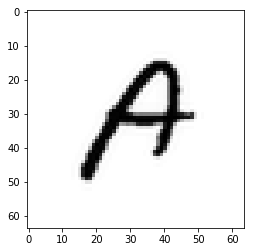

In [29]:
from keras.preprocessing import image

img = image.load_img('Dataset/KBND_A_2337.png')
x = image.img_to_array(img)
x = np.reshape(x,(1, 64, 64, 3))
x = x.astype('float32')
x = x/255

plt.imshow(img, cmap="gray")

In [30]:
preds = model.predict(x)

In [46]:
result = str(preds.argmax(axis=1))
print(result)
label_encoder.inverse_transform([argmax(result[2, :])])

[10]


TypeError: string indices must be integers

In [26]:
print(preds)

[[4.9581894e-11 1.4724127e-23 4.6861010e-10 2.2271201e-04 6.6897266e-14
  5.4004889e-08 3.2686751e-10 2.7186646e-17 1.0786238e-04 2.0111224e-15
  1.7191148e-08 9.9965739e-01 1.7806298e-09 1.1930257e-05 5.3199475e-08]]
